# Linear Regression using Mathematical Equations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(69)

In [3]:
X = 7*np.random.rand(100,1)-3
y = 9 + 3*X + np.random.randn(100, 1)

Text(0.5, 1.0, 'Randomly generated linear dataset')

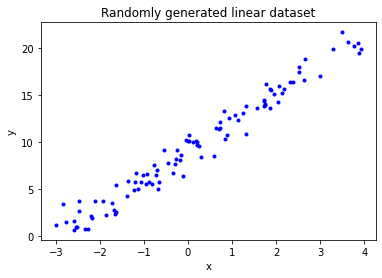

In [4]:
plt.plot(X,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Randomly generated linear dataset')

## 1. Normal equation 
$ \hat{\theta} = \left(\mathbf{X}^T\cdot\mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot y$

In [5]:
Xi = np.c_[np.ones((100,1)),X]

*Linear model fit* with **Normal equation**

In [6]:
theta_hat = np.linalg.inv(Xi.T.dot(Xi)).dot((Xi.T.dot(y)))

In [7]:
theta_hat

array([[9.08830119],
       [3.03868757]])

### Predict the value
$ \hat{y} = \mathbf{\theta}^T\cdot \mathbf{X}$ or <br>
$ \hat{y} = \mathbf{X}\cdot\mathbf{\theta}$ with additional parameters

In [8]:
x = np.array([[-3], [4]])
xi = np.c_[np.ones((2,1)), x]
y_hat = xi.dot(theta_hat)
y_hat

array([[-0.02776151],
       [21.24305145]])

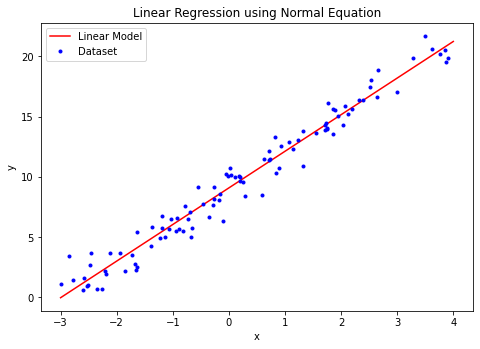

In [9]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y_hat, 'r-', label = 'Linear Model')
ax.plot(X, y, 'b.', label = 'Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression using Normal Equation')
ax.legend()

The equivalent code using *Scikit-Learn* looks like this

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(model.intercept_, model.coef_)

[9.08830119] [[3.03868757]]


In [11]:
model.predict(x)

array([[-0.02776151],
       [21.24305145]])

## 2. Batch Gradient Descent
$\nabla{MSE(\theta)} = {\underline{2} \\ m} {X}^T \cdot \left(X\cdot\theta-y\right)$ 

$\theta^{(next\phantom{0}step)} = \theta - \eta \nabla MSE(\theta)$ 

In [13]:
eta = 0.1
n = 1000
m = len(X)

theta = np.random.rand(2,1) # init random position

for i in range(n):
    gradients = 2/m * Xi.T.dot(Xi.dot(theta)-y)
    theta = theta - eta*gradients

In [14]:
theta

array([[9.08830119],
       [3.03868757]])